In [82]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

In [83]:
path = 'E:/Hightlight Generation/VYS/Project/MEL/mel_spectrogram_images'
data_dir = pathlib.Path(path)

In [84]:
data_dir

WindowsPath('E:/Hightlight Generation/VYS/Project/MEL/mel_spectrogram_images')

In [85]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Highlights', 'Non Highlights'], dtype='<U14')

In [86]:
benignPath = os.path.join(data_dir,'Highlights')
malignantPath = os.path.join(data_dir,'Non Highlights')

In [87]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

151

Non Highlights
Non Highlights
Highlights
Highlights
Non Highlights
Highlights
Non Highlights
Non Highlights
Highlights
Non Highlights
Non Highlights
Non Highlights
Non Highlights
Non Highlights
Non Highlights
Non Highlights
Non Highlights
Highlights
Non Highlights
Highlights
Highlights
Highlights
Highlights
Highlights
Non Highlights


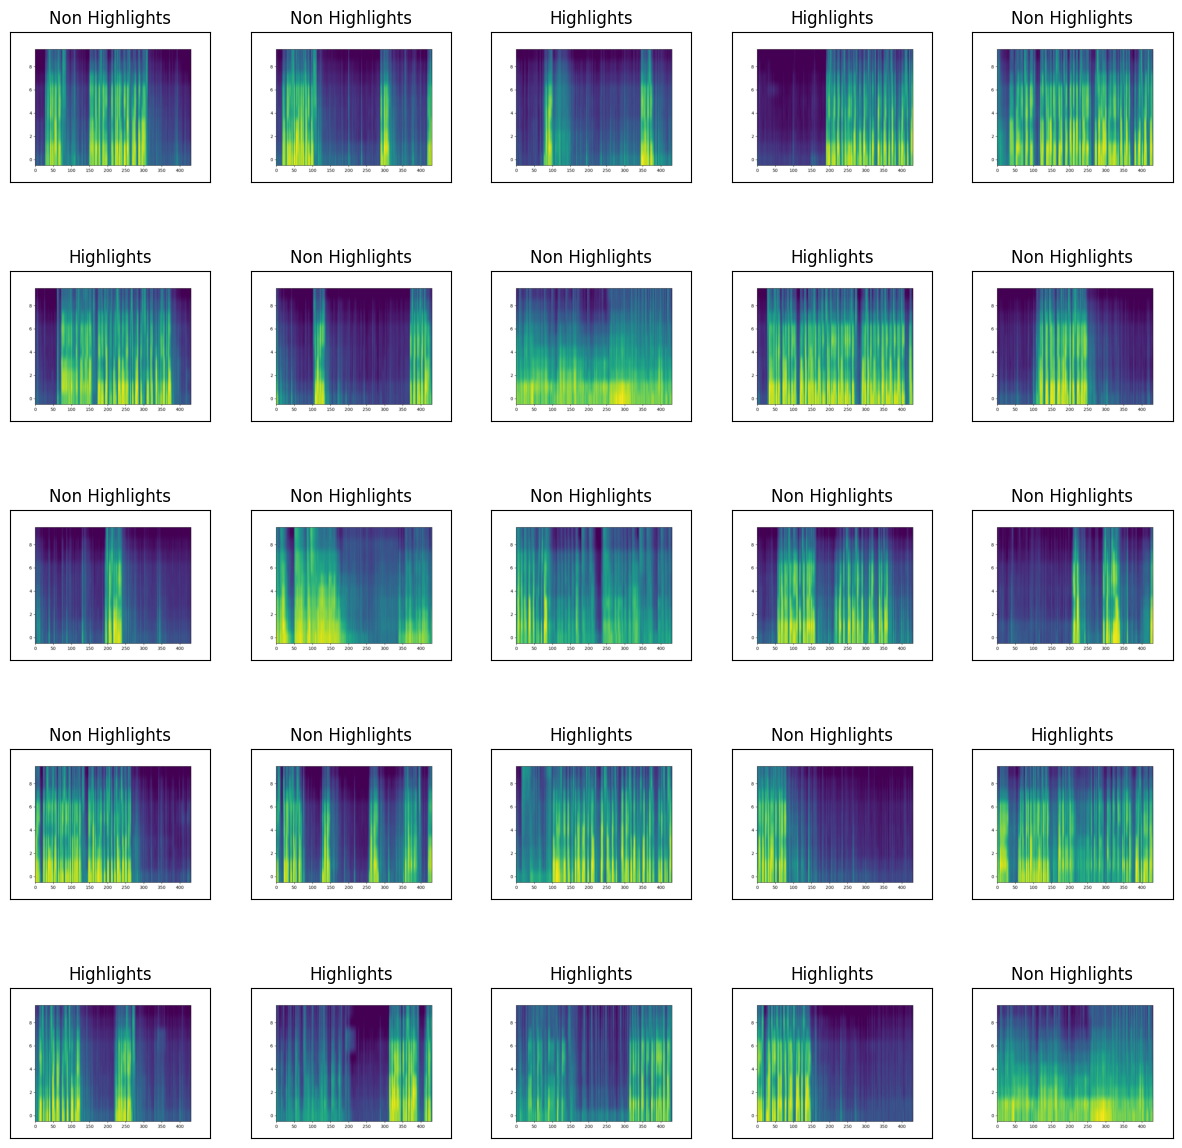

In [88]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    print(random_class)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)


In [89]:
imageCount = len(list(data_dir.glob('*/*.jpg')))
imageCount

0

In [90]:
from pathlib import Path
import imghdr

data_dir = 'E:/Hightlight Generation/VYS/Project/MEL/mel_spectrogram_images'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [91]:
batch_size = 32
img_height = 224
img_width = 224

In [92]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)


Found 151 files belonging to 2 classes.
Using 121 files for training.
Found 151 files belonging to 2 classes.
Using 30 files for validation.


In [93]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [94]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])


In [95]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)


Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.3945 - loss: 2.0732WARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000001AF63087060> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step - accuracy: 0.3916 - loss: 2.2126 - val_accuracy: 0.2667 - val_loss: 1.1439
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.4575 - loss: 0.9082 - va

In [96]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

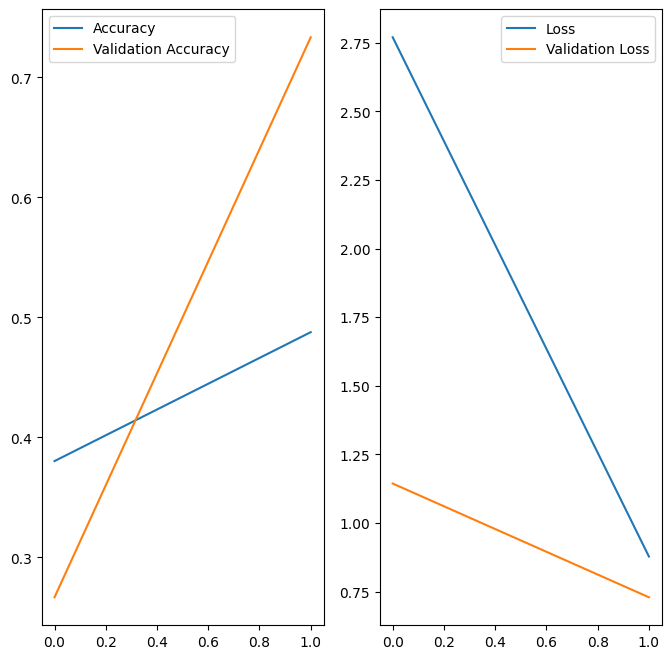

In [97]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()


In [98]:
model.evaluate(val_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7333 - loss: 0.7295


[0.7295096516609192, 0.7333333492279053]